In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "TMM"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/TMM/baseline

Average verified rate: 0.9620184818421186

Average of error rates: 0.048324675324675326

Total token count: 870476



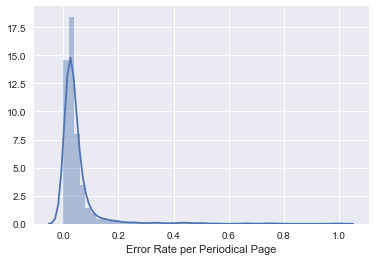

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 30 )

[('-', 1111),
 ("'", 540),
 ('¥', 474),
 ('w', 467),
 ('e', 451),
 ('ñ', 412),
 (')', 345),
 ('m', 331),
 ('n', 290),
 ('r', 290),
 ('t', 285),
 ('d', 273),
 ('con-', 259),
 ('f', 239),
 ('g', 237),
 ('re-', 221),
 ('tion', 198),
 ('mis-', 160),
 ('in-', 147),
 ('*', 145),
 ('(', 128),
 ('com-', 117),
 ('ñthe', 107),
 ('th', 106),
 ('be-', 105),
 ('¡', 91),
 ('de-', 87),
 ('sionary', 87),
 ('mission-', 82),
 ('ment', 78),
 ('ex-', 76),
 ('ary', 70),
 ('tions', 69),
 ('co', 68),
 ('x', 67),
 ('pa', 63),
 ('k', 62),
 ('en-', 61),
 ('u', 61),
 ('[illustrated]', 60),
 ('+', 60),
 ('per-', 59),
 ('pro-', 58),
 ('/', 58),
 ('z', 56),
 ('dis-', 53),
 ('ple', 51),
 ('peo-', 49),
 ('(the', 49),
 ('pre-', 48),
 ('ers', 47),
 ('an-', 46),
 ('un-', 46),
 ('ad-', 43),
 ('ence', 42),
 ('ñwe', 41),
 ('(illustrated)', 41),
 ('io', 41),
 ('oc', 40),
 ('_', 40),
 ('ber', 39),
 ('inter-', 39),
 ('ã', 39),
 ('ac-', 38),
 ('for-', 38),
 ('to-', 37),
 ('meet-', 37),
 ('im-', 36),
 ('thou-', 35),
 ('can-', 3

## Check Special Character Use

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)

[('¥', 474),
 ('ñ', 412),
 (')', 345),
 ('*', 145),
 ('(', 128),
 ('ñthe', 107),
 ('¡', 91),
 ('+', 60),
 ('[illustrated]', 60),
 ('/', 58),
 ('(the', 49),
 ('ñwe', 41),
 ('(illustrated)', 41),
 ('_', 40),
 ('ã', 39),
 (']', 33),
 ('ña', 32),
 ('ñall', 29),
 ('`', 27),
 ('(b)', 26),
 ('ñin', 26),
 ('(c)', 26),
 ('(a)', 26),
 ('(d)', 23),
 ('=', 23),
 ('ñit', 22),
 ('ñsubscriptions', 22),
 ('%', 22),
 ('ñelder', 21),
 ('departmentñ', 21),
 ('(a', 21),
 ('(march)', 20),
 ('ô', 19),
 ('¥¥', 19),
 ('(to', 19),
 ('ñan', 18),
 ('(see', 17),
 ('(for', 17),
 ('(april)', 16),
 ('(which', 16),
 ('ñand', 16),
 ('(e)', 16),
 ('(may)', 15),
 ('ñone', 15),
 ('\\', 15),
 ('(poem)', 14),
 ('£', 14),
 ('(and', 14),
 ('(including', 13),
 ('(as', 13),
 ('(in', 13),
 ('[see', 13),
 ('ñno', 12),
 ('(f)', 12),
 ('¥¥¥', 12),
 ('ñto', 12),
 ('holland)', 12),
 ('ñid', 12),
 ('(incorporated', 12),
 ('(concluded', 11),
 ('ñtest', 11),
 ('>', 11),
 ('(or', 11),
 ('[poem]', 10),
 ('(continued', 10),
 ('+contents+'

## Correction 1 -- Normalize Characters

In [14]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/TMM/correction1

Average verified rate: 0.9689343941867684

Average of error rates: 0.03858441558441559

Total token count: 869740



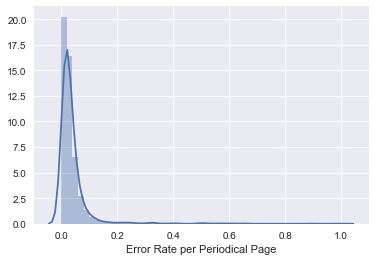

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [19]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 1170),
 ("'", 573),
 ('e', 479),
 ('w', 475),
 ('m', 337),
 ('t', 314),
 ('r', 307),
 ('d', 301),
 ('n', 295),
 ('f', 268),
 ('con-', 259),
 ('g', 250),
 ('re-', 222),
 ('tion', 198),
 ('mis-', 161),
 ('in-', 149),
 ('com-', 117),
 ('th', 109),
 ('be-', 105),
 ('de-', 87),
 ('sionary', 87),
 ('mission-', 82),
 ('ment', 78),
 ('ex-', 77),
 ('ary', 74),
 ('x', 72),
 ('co', 70),
 ('tions', 69),
 ('u', 63),
 ('pa', 63),
 ('k', 63),
 ('en-', 61),
 ('per-', 59),
 ('pro-', 58),
 ('z', 58),
 ('dis-', 53),
 ('ple', 51),
 ('peo-', 49),
 ('pre-', 48),
 ('ers', 47),
 ('un-', 46),
 ('an-', 46),
 ('ad-', 44),
 ('ence', 42),
 ('io', 42),
 ('oc', 40),
 ('ber', 40),
 ('inter-', 39),
 ('for-', 38),
 ('ac-', 38)]

## Correction 2 -- Correct Line Endings

In [21]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/TMM/correction2

Average verified rate: 0.9817024929526814

Average of error rates: 0.02631636363636364

Total token count: 862030



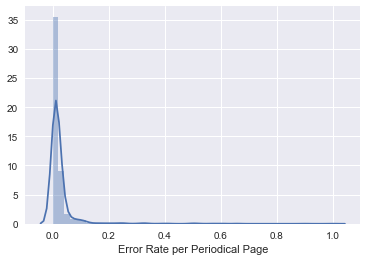

In [24]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [25]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 1157),
 ("'", 573),
 ('e', 479),
 ('w', 475),
 ('m', 337),
 ('t', 312),
 ('r', 305),
 ('d', 301),
 ('n', 295),
 ('f', 267),
 ('g', 250),
 ('th', 109),
 ('x', 72),
 ('co', 69),
 ('pa', 63),
 ('k', 63),
 ('u', 63),
 ('z', 58),
 ('io', 42),
 ('oc', 40),
 ('mis-', 39),
 ('oo', 33),
 ('cc', 29),
 ('sionary', 29),
 ('--', 28),
 ('money-order', 24),
 ("'the", 23),
 ('q', 21),
 ('al', 21),
 ('mt', 20),
 ('ary', 19),
 ('id', 19),
 ('spanish-speaking', 19),
 ('hausaland', 19),
 ("''", 19),
 ('stauffer', 19),
 ('ft', 18),
 ('mo', 18),
 ('zo', 18),
 ('basle', 18),
 ('re', 18),
 ('hasegawa', 17),
 ('couva', 17),
 ('kalaka', 17),
 ('-the', 17),
 ('sul', 17),
 ('okohira', 16),
 ('ro', 16),
 ('sabbathschool', 15),
 ('pp', 15)]

## Correction 3 -- Remove Extra Dashes

In [27]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

TMM18980101-V10-01-page1.txt: [('Mis-', 'Mis')]
TMM18980101-V10-01-page12.txt: [('-one', 'one'), ('-brought', 'brought'), ('-their', 'their'), ('-worship', 'worship')]
TMM18980101-V10-01-page13.txt: [('-appears', 'appears')]
TMM18980101-V10-01-page14.txt: [('-was', 'was')]
TMM18980101-V10-01-page15.txt: [('-Baptists', 'Baptists')]
TMM18980101-V10-01-page23.txt: [('respond-', 'respond')]
TMM18980101-V10-01-page26.txt: [('Waterloo-', 'Waterloo'), ('-Jamaica.', 'Jamaica.'), ('-by', 'by')]
TMM18980101-V10-01-page28.txt: [('-this', 'this')]
TMM18980101-V10-01-page32.txt: [('-WE', 'WE')]
TMM18980101-V10-01-page4.txt: [('--a', '-a'), ('-', ''), ('-rse', 'rse'), ('-', '')]
TMM18980101-V10-01-page9.txt: [('ene-', 'ene')]
TMM18980201-V10-02-page11.txt: [('---', '--')]
TMM18980201-V10-02-page13.txt: [('-K', 'K'), ('-N', 'N'), ('AricuN-', 'AricuN'), ('-', ''), ('-', '')]
TMM18980201-V10-02-page14.txt: [('Anglo-', 'Anglo'), ('-too', 'too')]
TMM18980201-V10-02-page17.txt: [('-miles', 'miles'), ('op-

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/TMM/correction3

Average verified rate: 0.9839672985814993

Average of error rates: 0.023232207792207794

Total token count: 861614



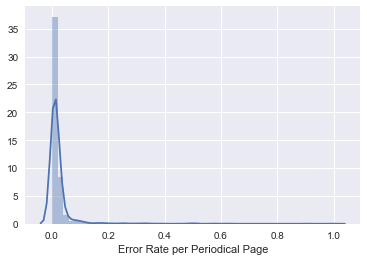

In [30]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [31]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 583),
 ('e', 484),
 ('w', 476),
 ('m', 341),
 ('t', 326),
 ('r', 309),
 ('d', 302),
 ('n', 298),
 ('f', 269),
 ('g', 250),
 ('th', 109),
 ('x', 75),
 ('co', 70),
 ('k', 66),
 ('pa', 64),
 ('u', 64),
 ('z', 61),
 ('mis', 42),
 ('io', 42),
 ('oc', 40),
 ('oo', 33),
 ('cc', 29),
 ('sionary', 29),
 ('re', 25),
 ('al', 23),
 ("'the", 23),
 ('q', 22),
 ('mt', 20),
 ('hausaland', 19),
 ('id', 19),
 ("''", 19),
 ('stauffer', 19),
 ('ary', 19),
 ('basle', 18),
 ('zo', 18),
 ('ft', 18),
 ('mo', 18),
 ('couva', 17),
 ('kalaka', 17),
 ('hasegawa', 17),
 ('sul', 17),
 ('okohira', 16),
 ('ro', 16),
 ('pp', 15),
 ('helsingfors', 15),
 ('sabbathschool', 15),
 ("hours'", 15),
 ('te', 15),
 ('schwantes', 15),
 ('raiatea', 15)]

## Correction 4 -- Remove Extra Quotation Marks

In [33]:
# %load shared_elements/remove_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

TMM18980101-V10-01-page11.txt: [("'tis", 'tis')]
TMM18980101-V10-01-page12.txt: [("'his", 'his')]
TMM18980101-V10-01-page13.txt: [("'nough", 'nough')]
TMM18980101-V10-01-page16.txt: [("'The", 'The')]
TMM18980101-V10-01-page3.txt: [("'Redeemer", 'Redeemer')]
TMM18980101-V10-01-page4.txt: [("'YWVP", 'YWVP')]
TMM18980101-V10-01-page5.txt: [("'the", 'the'), ("'which", 'which'), ("'sphere", 'sphere')]
TMM18980201-V10-02-page14.txt: [("'my", 'my')]
TMM18980201-V10-02-page34.txt: [("'Contemplated", 'Contemplated')]
TMM18980301-V10-03-page6.txt: [("'t", 't')]
TMM18980401-V10-04-page12.txt: [("'put", 'put')]
TMM18980401-V10-04-page13.txt: [("'a", 'a')]
TMM18980401-V10-04-page17.txt: [("'The", 'The')]
TMM18980401-V10-04-page22.txt: [("'one", 'one'), ("'of", 'of')]
TMM18980401-V10-04-page31.txt: [("'s", 's'), ("'s", 's'), ("'s", 's'), ("'out", 'out')]
TMM18980401-V10-04-page4.txt: [("'S", 'S')]
TMM18980501-V10-05-page14.txt: [("'appreciate", 'appreciate')]
TMM18980501-V10-05-page28.txt: [("'g", '

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/TMM/correction4

Average verified rate: 0.9845119517865869

Average of error rates: 0.022646753246753245

Total token count: 861503



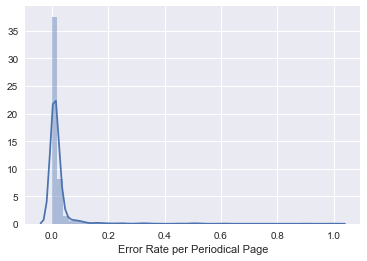

In [36]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [37]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 485),
 ('w', 476),
 ("'", 466),
 ('t', 344),
 ('m', 343),
 ('r', 313),
 ('d', 303),
 ('n', 302),
 ('f', 271),
 ('g', 254),
 ('th', 110),
 ('x', 76),
 ('co', 70),
 ('k', 68),
 ('pa', 64),
 ('u', 64),
 ('z', 63),
 ('mis', 42),
 ('io', 42),
 ('oc', 40),
 ('oo', 33),
 ('cc', 31),
 ('sionary', 29),
 ('re', 25),
 ('al', 23),
 ('q', 22),
 ('mt', 20),
 ('hausaland', 19),
 ('id', 19),
 ('ft', 19),
 ('stauffer', 19),
 ('ary', 19),
 ('basle', 18),
 ('zo', 18),
 ('mo', 18),
 ('couva', 17),
 ('kalaka', 17),
 ('hasegawa', 17),
 ('sul', 17),
 ('okohira', 16),
 ('ro', 16),
 ('pp', 15),
 ('helsingfors', 15),
 ('sabbathschool', 15),
 ("hours'", 15),
 ('te', 15),
 ('schwantes', 15),
 ('raiatea', 15),
 ('wm', 15),
 ('ioo', 14)]

## Correction 5 -- Rejoin Split Words

In [39]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

TMM18980101-V10-01-page1.txt: [('Mis', 'SIONARY')]
TMM18980101-V10-01-page31.txt: [('ro', 'of')]
TMM18980101-V10-01-page4.txt: [('fil', 'A')]
TMM18980201-V10-02-page37.txt: [('MIS', 'SION'), ('QUAR', 'TER')]
TMM18980201-V10-02-page38.txt: [('zo', 'o')]
TMM18980201-V10-02-page39.txt: [('SECRE', 'TARIES')]
TMM18980201-V10-02-page9.txt: [('Ning', 'po')]
TMM18980301-V10-03-page24.txt: [('Mis', 'SIONARY')]
TMM18980301-V10-03-page25.txt: [('es', 'd'), ('mi', 'o'), ('por', 'no'), ('Aqui', 'no')]
TMM18980301-V10-03-page39.txt: [('Mis', 'SION')]
TMM18980301-V10-03-page6.txt: [('Fi', 'le')]
TMM18980301-V10-03-page8.txt: [('Mc', 'Carthy')]
TMM18980401-V10-04-page26.txt: [('HISTOR', 'ICAL')]
TMM18980401-V10-04-page3.txt: [('G.', '')]
TMM18980401-V10-04-page36.txt: [('pais', 'a')]
TMM18980401-V10-04-page7.txt: [("KING'", 'S')]
TMM18980501-V10-05-page33.txt: [("God'", 's')]
TMM18980501-V10-05-page35.txt: [('MIS', 'SION'), ('QUAR', 'TER')]
TMM18980501-V10-05-page39.txt: [('re', 'leased')]
TMM18980601

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/TMM/correction5

Average verified rate: 0.984760022894214

Average of error rates: 0.022267532467532464

Total token count: 861353



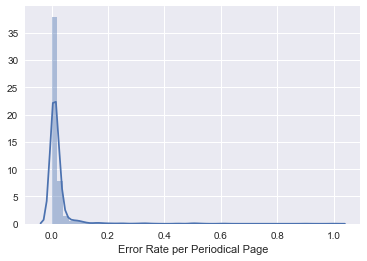

In [42]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [43]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 484),
 ('w', 476),
 ("'", 466),
 ('m', 342),
 ('t', 342),
 ('r', 312),
 ('d', 302),
 ('n', 300),
 ('f', 271),
 ('g', 254),
 ('th', 107),
 ('x', 76),
 ('co', 69),
 ('k', 68),
 ('u', 64),
 ('pa', 63),
 ('z', 63),
 ('io', 42),
 ('oc', 40),
 ('oo', 33),
 ('cc', 31),
 ('al', 21),
 ('q', 21),
 ('mt', 20),
 ('re', 20),
 ('hausaland', 19),
 ('id', 19),
 ('ary', 19),
 ('ft', 19),
 ('stauffer', 19),
 ('zo', 18),
 ('basle', 18),
 ('mo', 18),
 ('couva', 17),
 ('kalaka', 17),
 ('hasegawa', 17),
 ('sul', 17),
 ('okohira', 16),
 ('helsingfors', 15),
 ('pp', 15),
 ('sabbathschool', 15),
 ("hours'", 15),
 ('schwantes', 15),
 ('raiatea', 15),
 ('wm', 15),
 ('ro', 15),
 ('ioo', 14),
 ('seventhday', 14),
 ('ic', 14),
 ('te', 14)]

## Correction 6 -- Rejoin Split Words II

In [45]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

TMM18980201-V10-02-page37.txt: [('V', 'ermont')]
TMM18980301-V10-03-page25.txt: [('No', 'se')]
TMM18980301-V10-03-page39.txt: [('MisSION', 'ARY')]
TMM18980501-V10-05-page33.txt: [('whole', 'heartedness')]
TMM18980601-V10-06-page16.txt: [('r', 'OW'), ('the', 'Re')]
TMM18980901-V10-09-page5.txt: [('sub', 'terranean')]
TMM18981001-V10-10-page28.txt: [('w', 'ork')]
TMM18981201-V10-12-page42.txt: [('u', 'tA')]
TMM18981201-V10-12-page45.txt: [('Character', 'istic')]
TMM18990101-V11-01-page14.txt: [('es', 'Pecially')]
TMM18990101-V11-01-page47.txt: [('MISSION', 'ARY')]
TMM18990101-V11-01-page48.txt: [('repre', 'sentative')]
TMM18990201-V11-02-page45.txt: [('o', 'ffer')]
TMM18990201-V11-02-page54.txt: [('MISSION', 'ARY')]
TMM18990301-V11-03-page34.txt: [('Num', 'ber')]
TMM18990301-V11-03-page38.txt: [('MISSION', 'ARY')]
TMM18990301-V11-03-page9.txt: [('r', 'oth')]
TMM18990401-V11-04-page38.txt: [('MISSION', 'ARY')]
TMM18990401-V11-04-page39.txt: [('repre', 'sentative')]
TMM18990501-V11-05-page

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/TMM/correction6

Average verified rate: 0.9848273395829028

Average of error rates: 0.02219012987012987

Total token count: 861286



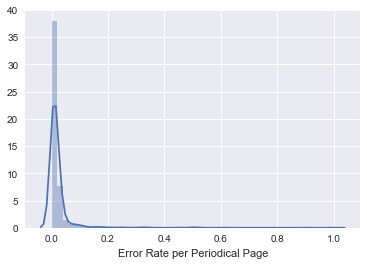

In [48]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [49]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 484),
 ('w', 475),
 ("'", 466),
 ('m', 342),
 ('t', 342),
 ('r', 310),
 ('d', 302),
 ('n', 300),
 ('f', 271),
 ('g', 254),
 ('th', 107),
 ('x', 76),
 ('co', 68),
 ('k', 67),
 ('u', 64),
 ('pa', 63),
 ('z', 63),
 ('io', 42),
 ('oc', 40),
 ('oo', 33),
 ('cc', 31),
 ('al', 21),
 ('q', 21),
 ('mt', 20),
 ('hausaland', 19),
 ('id', 19),
 ('ft', 19),
 ('stauffer', 19),
 ('zo', 18),
 ('basle', 18),
 ('mo', 18),
 ('couva', 17),
 ('kalaka', 17),
 ('hasegawa', 17),
 ('sul', 17),
 ('re', 17),
 ('okohira', 16),
 ('helsingfors', 15),
 ('pp', 15),
 ('sabbathschool', 15),
 ("hours'", 15),
 ('schwantes', 15),
 ('raiatea', 15),
 ('wm', 15),
 ('ro', 15),
 ('ioo', 14),
 ('seventhday', 14),
 ('ic', 14),
 ("''", 13),
 ('te', 13)]

## Review Remaining Errors

In [50]:
GoH.reports.docs_with_high_error_rate(summary)

[('TMM18980701-V10-07-page42.txt', 1.0),
 ('TMM18990201-V11-02-page10.txt', 0.9),
 ('TMM19000301-V12-03-page9.txt', 0.614),
 ('TMM18980101-V10-01-page4.txt', 0.605),
 ('TMM18991101-V11-11-page23.txt', 0.534),
 ('TMM18980301-V10-03-page25.txt', 0.517),
 ('TMM18990801-V11-08-page11.txt', 0.512),
 ('TMM18980401-V10-04-page4.txt', 0.5),
 ('TMM18990301-V11-03-page17.txt', 0.5),
 ('TMM18990701-V11-07-page10.txt', 0.5),
 ('TMM18990401-V11-04-page4.txt', 0.5),
 ('TMM18980301-V10-03-page6.txt', 0.449),
 ('TMM18980601-V10-06-page20.txt', 0.448),
 ('TMM19020301-V14-03-page2.txt', 0.363),
 ('TMM18980501-V10-05-page28.txt', 0.341),
 ('TMM18980301-V10-03-page18.txt', 0.333),
 ('TMM18980301-V10-03-page10.txt', 0.333),
 ('TMM18990501-V11-05-page48.txt', 0.333),
 ('TMM18990801-V11-08-page48.txt', 0.321),
 ('TMM19001001-V12-10-page1.txt', 0.317),
 ('TMM19000601-V12-06-page48.txt', 0.302),
 ('TMM19000101-V12-01-page10.txt', 0.291),
 ('TMM18990101-V11-01-page48.txt', 0.263),
 ('TMM18981201-V10-12-page20.t

In [52]:
# %load shared_elements/high_error_rates.py
doc_keys = [x[0] for x in GoH.reports.docs_with_high_error_rate(summary) if x[1] > 0.3]

GoH.utilities.open_original_docs(doc_keys, directories['cycle'])

Opened files: 

TMM18980701-V10-07-page42.txt

TMM18990201-V11-02-page10.txt

TMM19000301-V12-03-page9.txt

TMM18980101-V10-01-page4.txt

TMM18991101-V11-11-page23.txt

TMM18980301-V10-03-page25.txt

TMM18990801-V11-08-page11.txt

TMM18980401-V10-04-page4.txt

TMM18990301-V11-03-page17.txt

TMM18990701-V11-07-page10.txt

TMM18990401-V11-04-page4.txt

TMM18980301-V10-03-page6.txt

TMM18980601-V10-06-page20.txt

TMM19020301-V14-03-page2.txt

TMM18980501-V10-05-page28.txt

TMM18980301-V10-03-page18.txt

TMM18980301-V10-03-page10.txt

TMM18990501-V11-05-page48.txt

TMM18990801-V11-08-page48.txt

TMM19001001-V12-10-page1.txt

TMM19000601-V12-06-page48.txt



Most of the high error documents match the usual pattern of maps, images, and charts. One interesting exception is "TMM18980301-V10-03-page25.txt", which is in Spanish. I examined the original OCR and there were no accent marks that were lost during normalizing.

In [55]:
GoH.reports.long_errors(errors_summary, min_length=15)

(['austria-hungaria',
  'scripture-sabbath',
  'gospel-commission',
  'elevatedrailroad',
  'newly-established',
  'darjeeling-above',
  'spanish-speaking',
  'soul-and-body-destroying',
  'into-insignificance',
  'heaven-descended',
  'hastily-organized',
  'greatgrandparents',
  "'globetrottings'",
  'hard-heartedness',
  'stivkimikarkaaagiaiwatkaaiiiikiiiikit',
  'scene-guadalajara',
  'self-commendation',
  'apoitleshipbeitring',
  'interestinebible',
  'fourteenyear-old',
  'mamouret-ul-aziz',
  'nezdterrerwiethe',
  'cigarette-papers',
  'pylrlitigeltrlile',
  'self-denyingfollowers',
  'joinherinherlabors',
  'artificially-made',
  "controversy'''among",
  'out-stations--one',
  'long-experienced',
  'intelligent-looking',
  'milkailkiiticimallikillitcattikilit',
  'spanish-american',
  'otherispanish-speaking',
  'charity-begins-at-home',
  'self-complacency',
  "looks'upon-their",
  'inexactconformity',
  'self-aggrandizement',
  'daughters-in-law',
  'fourthsabbathexercise',
